In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor

import math
import numpy as np

from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import random

from pathlib import Path

## Set path to dir with model projects

In [2]:
projects_path = Path("/home/falaxdb/Repos/minus1/transformer_decoder_training/saved_files/saved_models")

## create training template + model dir

In [3]:
import transformer_decoder_training.helper_functions as helper


config = helper.create_json_template()

# Set model project name (for directory name)
config["model_project_name"] = "transformer_01"

# Set model parameters
config["model_params"]["num_emb"] = 24
config["model_params"]["hidden_size"] = 256
config["model_params"]["num_layers"] = 8
config["model_params"]["num_heads"] = 8
# config["model_params"]["output_dim"] = 10  can be set optionally

# Set training parameters
config["training_params"]["learning_rate"] = 0.001
config["training_params"]["num_epochs"] = 21
config["training_params"]["optimizer"] = "Adam"
config["training_params"]["loss_fn"] = "CrossEntropyLoss"

# Set training data parameters
config["training_data_params"]["sos_token"] = [[1] * 24]
config["training_data_params"]["pad_token"] = [[2] * 24]
config["training_data_params"]["snapshot_interval"] = 0.1
config["training_data_params"]["batch_size"] = 64
config["training_data_params"]["sequence_length"] = 64
config["training_data_params"]["stride"] = 16
config["training_data_params"]["test_size"] = 0.2

config_path = helper.save_json_config(config, projects_path)

## Train model from config

Processed dataset (1038/1038): 100%|██████████| 1038/1038 [00:10<00:00, 98.45it/s] 


Processed 1038 of 1038 files
Epoch: 1, Train loss: 17.800, Val loss: 17.224, Epoch time = 21.122s


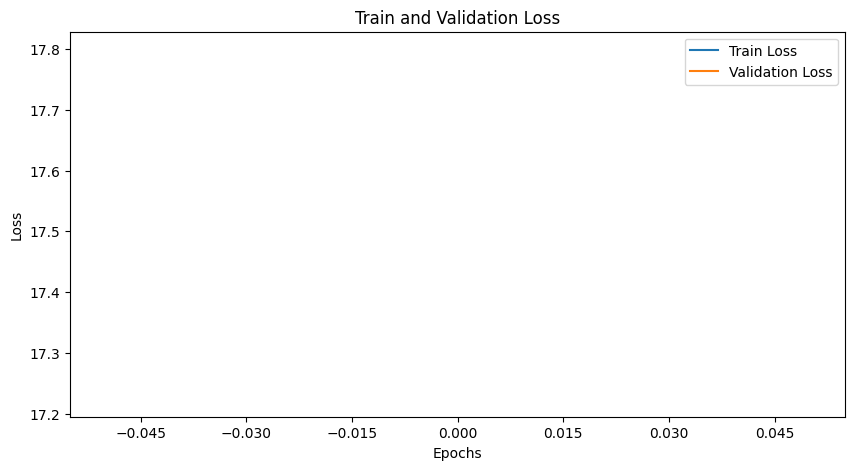

Epoch: 2, Train loss: 17.268, Val loss: 16.916, Epoch time = 21.173s


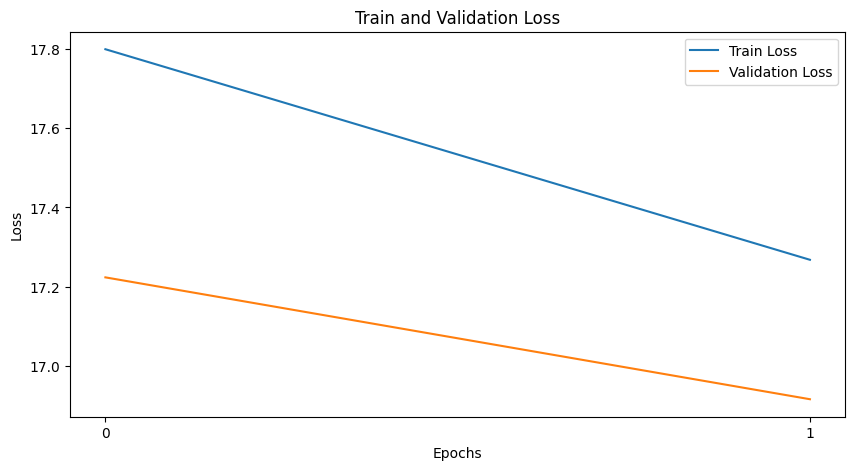

Epoch: 3, Train loss: 17.060, Val loss: 16.846, Epoch time = 21.555s


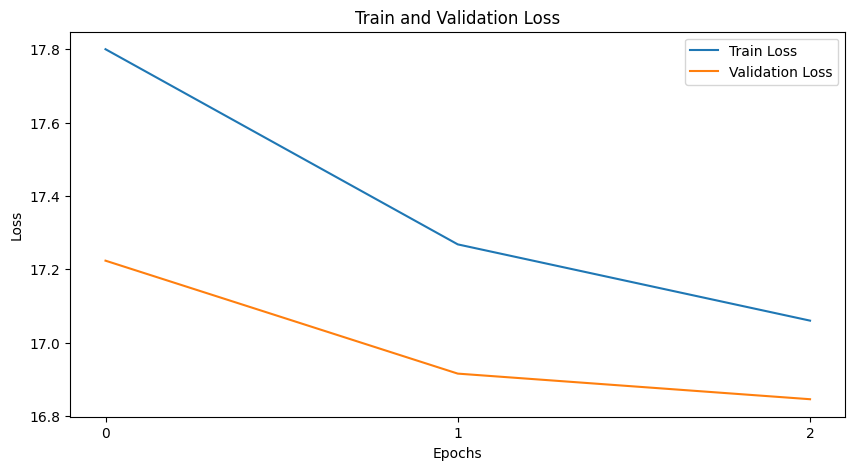

Epoch: 4, Train loss: 16.947, Val loss: 16.740, Epoch time = 21.267s


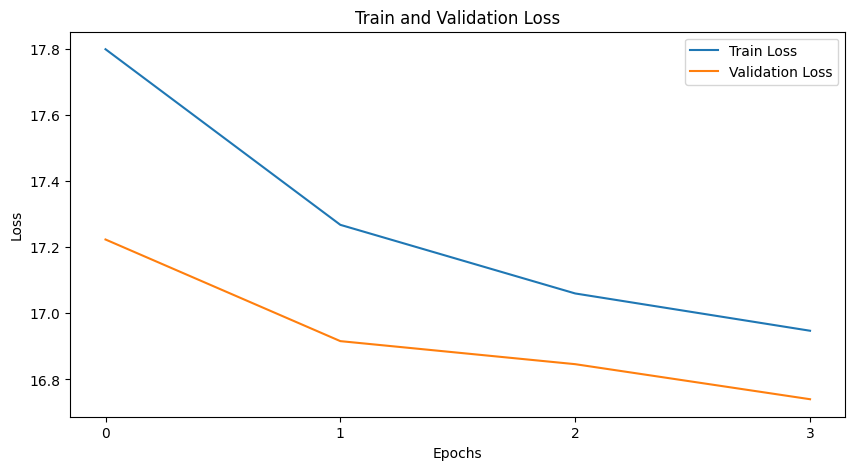

Epoch: 5, Train loss: 16.871, Val loss: 16.689, Epoch time = 20.907s


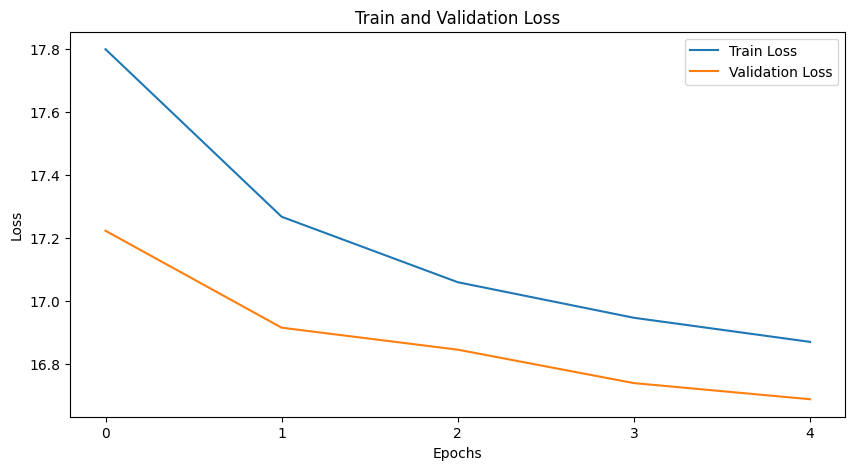

Epoch: 6, Train loss: 16.813, Val loss: 16.641, Epoch time = 20.895s


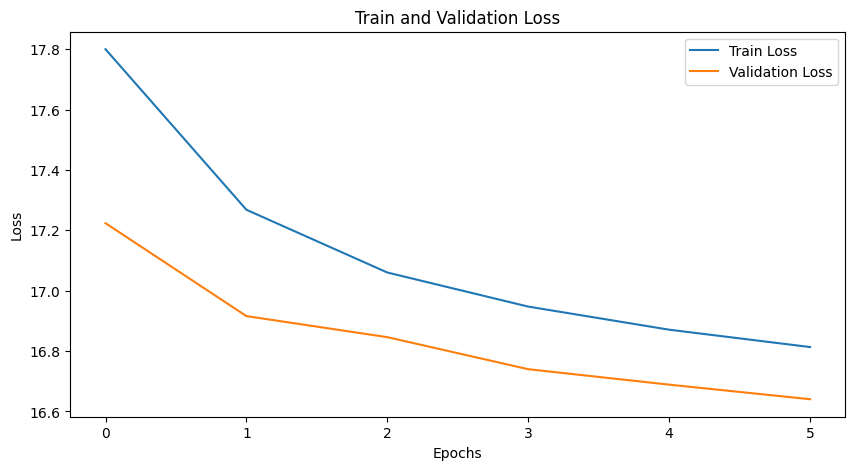

Epoch: 7, Train loss: 16.765, Val loss: 16.625, Epoch time = 20.898s


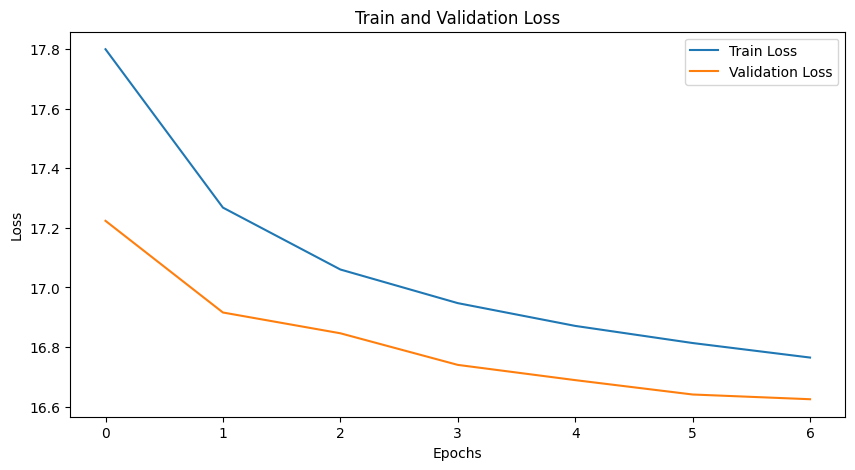

Epoch: 8, Train loss: 16.726, Val loss: 16.596, Epoch time = 20.869s


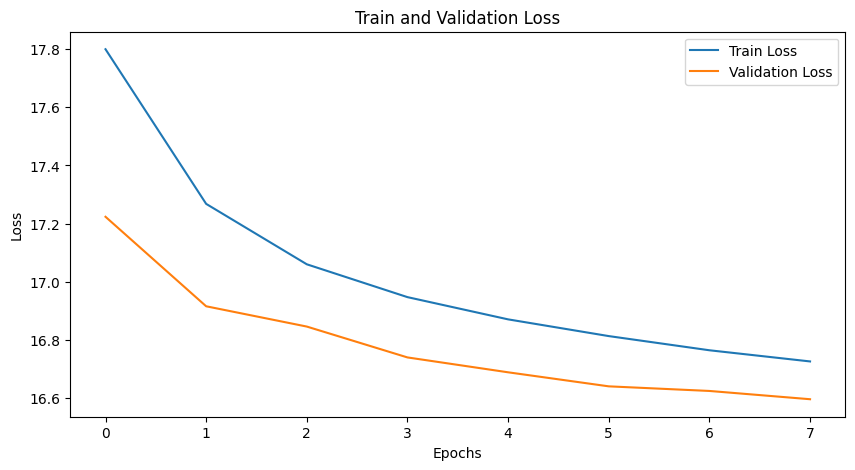

Epoch: 9, Train loss: 16.690, Val loss: 16.583, Epoch time = 21.218s


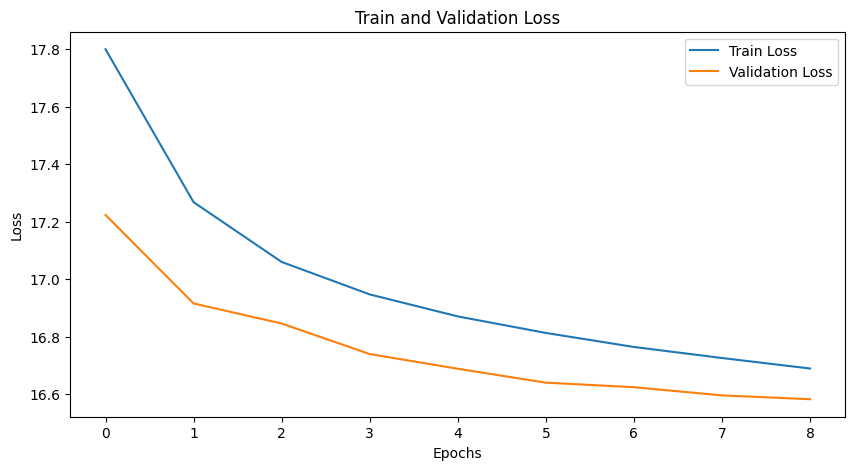

Epoch: 10, Train loss: 16.657, Val loss: 16.551, Epoch time = 20.773s


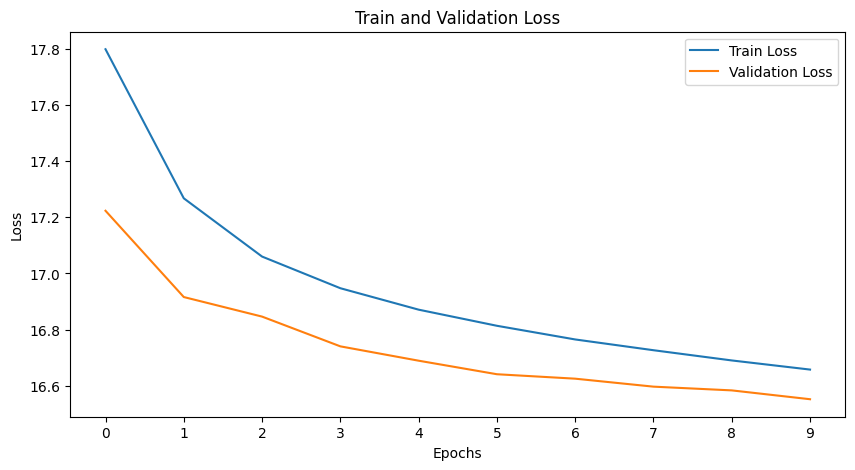

Epoch: 11, Train loss: 16.626, Val loss: 16.532, Epoch time = 25.559s


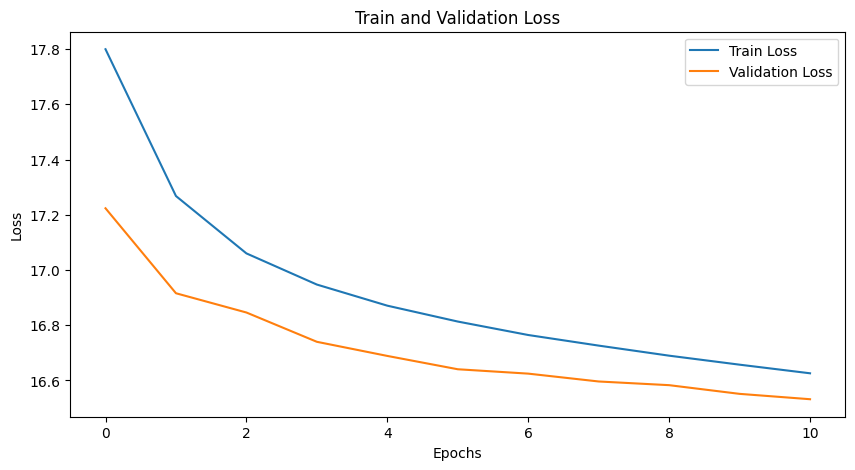

Epoch: 12, Train loss: 16.596, Val loss: 16.530, Epoch time = 27.325s


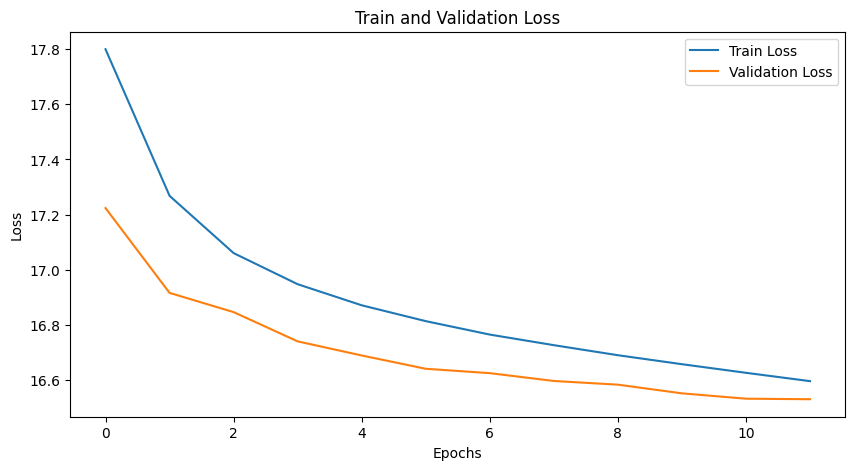

Epoch: 13, Train loss: 16.569, Val loss: 16.511, Epoch time = 27.511s


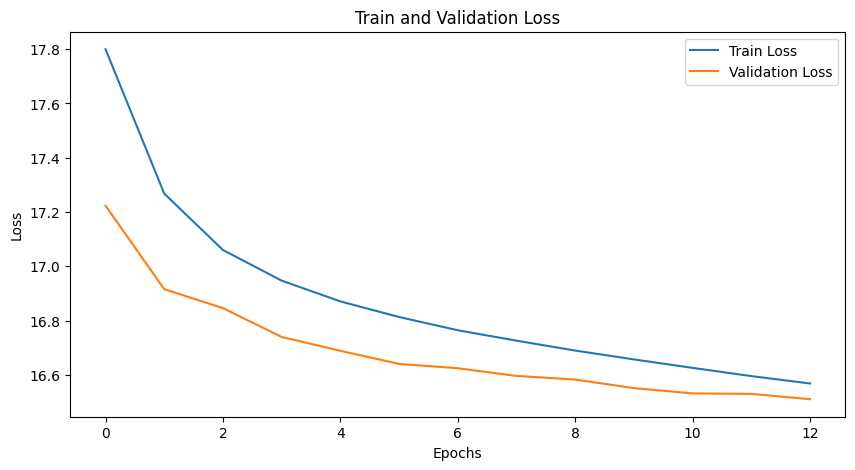

Epoch: 14, Train loss: 16.539, Val loss: 16.522, Epoch time = 32.292s


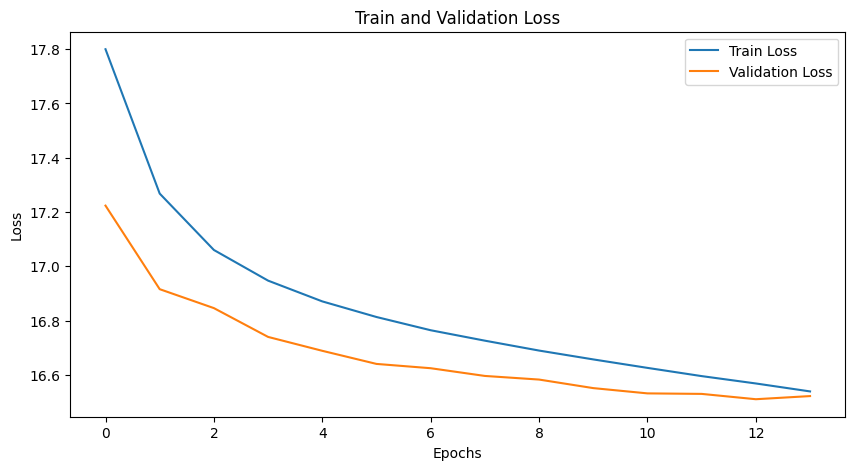

Epoch: 15, Train loss: 16.514, Val loss: 16.493, Epoch time = 26.801s


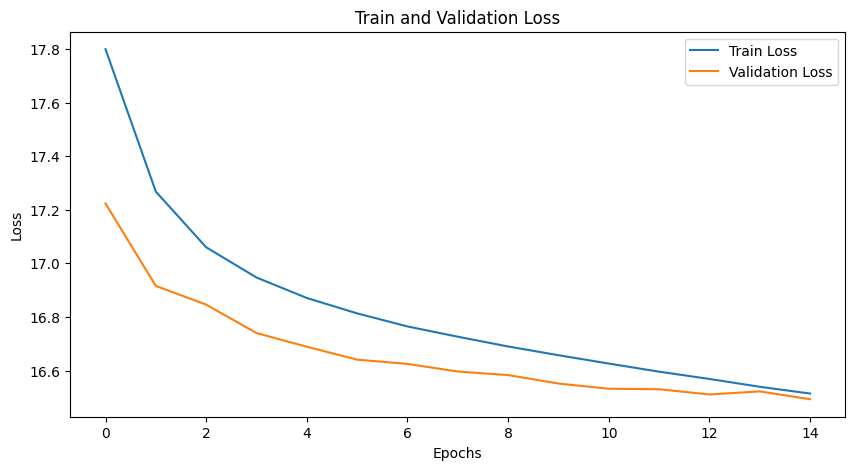

Epoch: 16, Train loss: 16.486, Val loss: 16.450, Epoch time = 49.071s


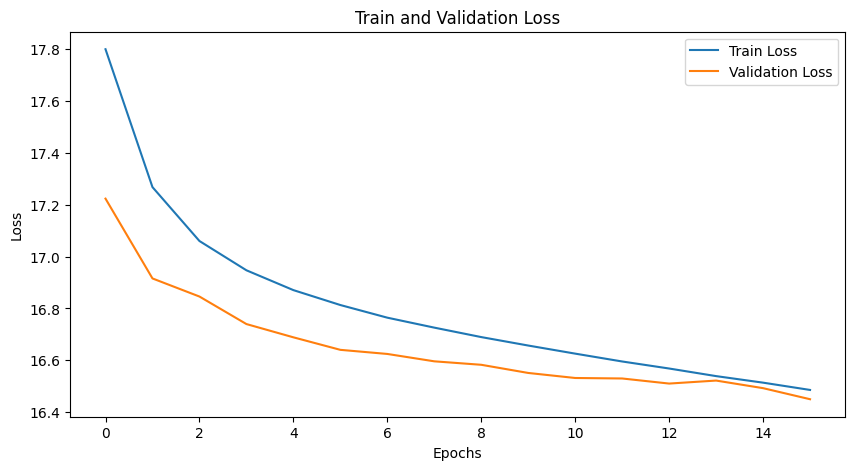

Epoch: 17, Train loss: 16.461, Val loss: 16.455, Epoch time = 35.110s


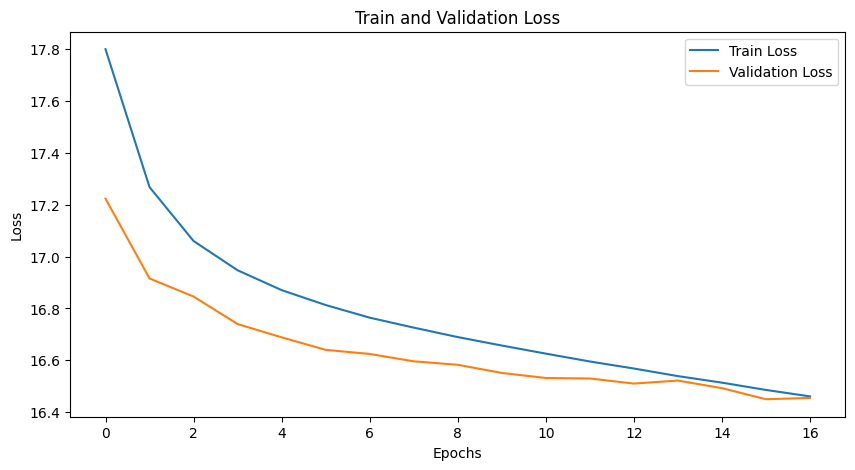

Epoch: 18, Train loss: 16.435, Val loss: 16.449, Epoch time = 38.414s


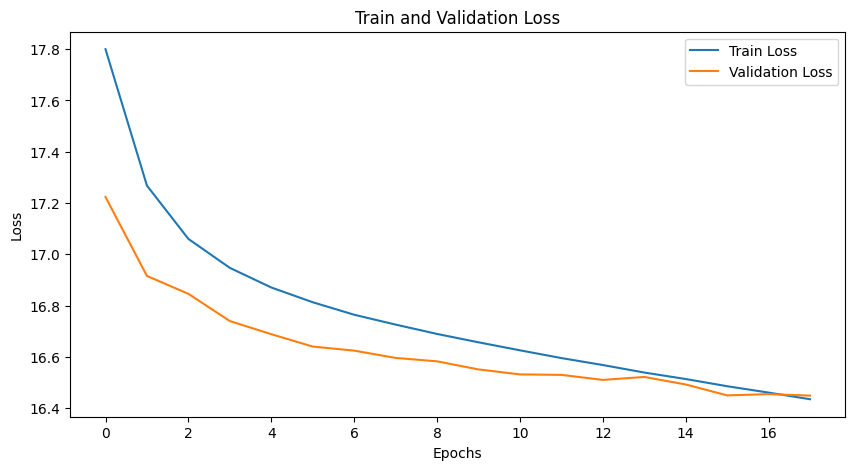

Epoch: 19, Train loss: 16.409, Val loss: 16.426, Epoch time = 31.789s


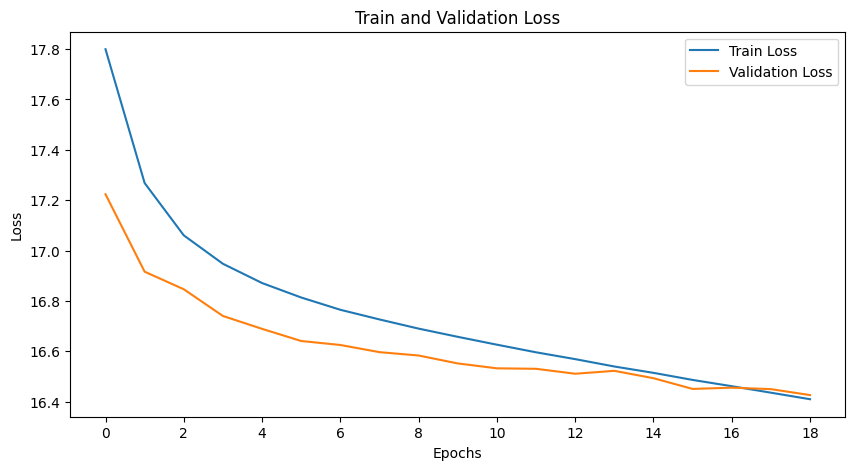

Epoch: 20, Train loss: 16.384, Val loss: 16.420, Epoch time = 40.306s


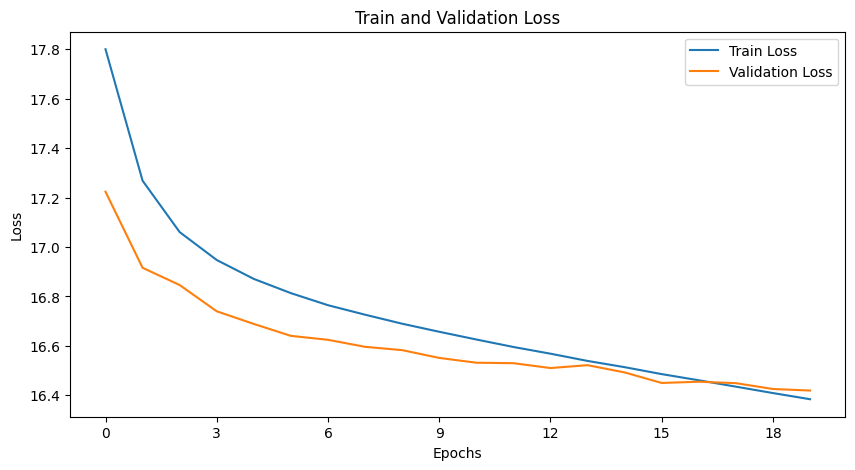

Epoch: 21, Train loss: 16.360, Val loss: 16.400, Epoch time = 34.987s


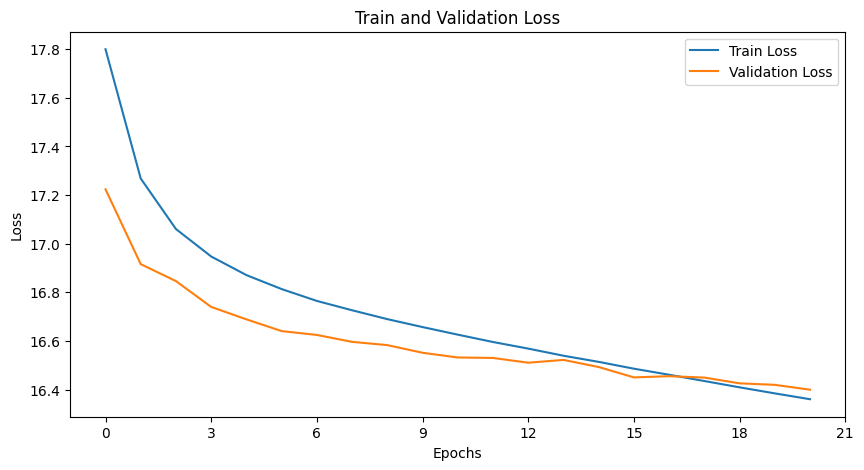

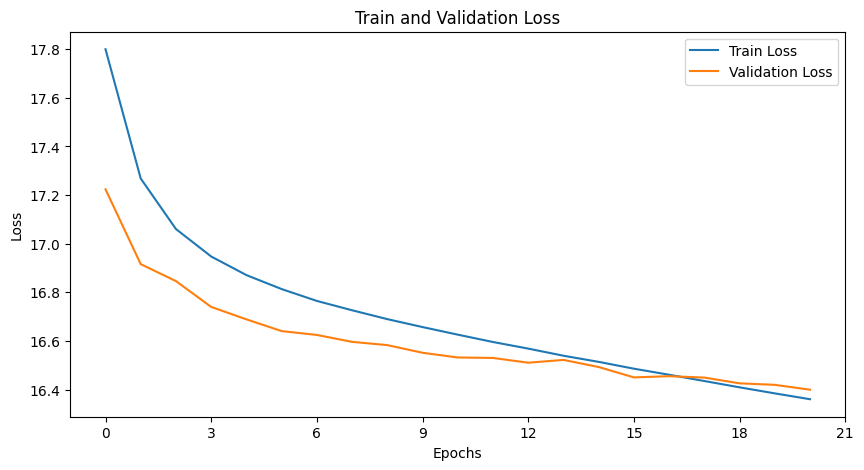

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

dataset_dir = "/home/falaxdb/Repos/minus1/datasets/maestro_v3_split/hands_split_into_seperate_midis"

helper.train_model_from_config(str(config_path), dataset_dir, device)